## AirBnB Assignment Part II  
#### BY: Lakshay Sharma

#### Guidelines

- Go through the data dictionary thoroughly before starting the assignment. That will give you a good idea of what each column represents before you begin the analysis.


- Read each instruction carefully, identify the task to be performed, and only then write the required code. The assignment is meant to be straightforward. You do not need to perform additional analyses that are not requested explicitly. However you are encouraged to perform a few additional analyses to get deeper into the insights


- Some of the tasks might require using functions you may not have used previously. In such cases, you should rely on the library documentation you referred to in the modules. Please understand that completing this assignment is a learning process, and research is part of it.


- Always run the cells of the Notebook sequentially, restart the kernel, and run all the cells to avoid runtime errors.


- For each of the tasks, there's a code cell where you are supposed to write the code and a markdown cell below it mentioning to either write the answer or mention your observations/insights from the output of the code.


- Many of the questions will require you to view them from multiple angles. You have been asked to **observe any trends in the visualizations and provide insights for these trends**. In other words, there will be no fixed answers. You are expected to apply your problem-solving skills to come up with solutions and also document your work appropriately; both of these are part of the assignment grading.

In [1]:
##Import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
df = pd.read_csv(r"C:\Users\laksh\OneDrive\Desktop\UPGRADE\TABLEAU\airbnblistings_Dataset.csv")

In [3]:
#check the top 5 rows
df.head()

,id,name,host_id,host_name,host_since_Year,neighbourhood,latitude,longitude,room_type,price,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,49,...,2022-06-01,4.89,4.93,5.00,4.97,4.98,4.69,4.82,2,1.0
1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009,Centrum-Oost,52.36407,4.89393,Private room,106,...,2020-04-09,4.44,4.69,4.79,4.63,4.62,4.87,4.49,2,1.0
2,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010,Centrum-West,52.38761,4.89188,Private room,126,...,2022-04-24,4.94,4.92,4.95,4.95,4.92,4.89,4.79,2,1.0
3,28871,Comfortable double room,124245,Edwin,2010,Centrum-West,52.36775,4.89092,Private room,75,...,2022-06-04,4.88,4.95,4.90,4.96,4.94,4.97,4.83,2,1.0
4,29051,Comfortable single room,124245,Edwin,2010,Centrum-Oost,52.36584,4.89111,Private room,55,...,2022-06-02,4.79,4.88,4.84,4.92,4.91,4.87,4.76,1,1.0


In [4]:
# checking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6173 entries, 0 to 6172
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           6173 non-null   int64  
 1   name                         6173 non-null   object 
 2   host_id                      6173 non-null   int64  
 3   host_name                    6173 non-null   object 
 4   host_since_Year              6173 non-null   int64  
 5   neighbourhood                6173 non-null   object 
 6   latitude                     6173 non-null   float64
 7   longitude                    6173 non-null   float64
 8   room_type                    6173 non-null   object 
 9   price                        6173 non-null   int64  
 10  minimum_nights               6173 non-null   int64  
 11  number_of_reviews            6173 non-null   int64  
 12  last_review                  5583 non-null   object 
 13  review_scores_rati

In [5]:
# checking the null value in the dataset 
df.isna().sum()

id                               0
name                             0
host_id                          0
host_name                        0
host_since_Year                  0
neighbourhood                    0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimum_nights                   0
number_of_reviews                0
last_review                    590
review_scores_rating           590
review_scores_accuracy         598
review_scores_cleanliness      598
review_scores_checkin          598
review_scores_communication    598
review_scores_location         598
review_scores_value            598
accommodates                     0
bedrooms                       314
dtype: int64

In [6]:
# selecting the numerical data
df.describe()

,id,host_id,host_since_Year,latitude,longitude,price,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,accommodates,bedrooms
count,6.173000e+03,6.173000e+03,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,6173.000000,5583.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,6173.000000,5859.000000
mean,4.426091e+16,9.147516e+07,2015.260975,52.366103,4.892384,198.019601,4.497813,50.760408,4.800856,4.840199,4.752768,4.880366,4.885469,4.776165,4.652716,2.994978,1.599420
std,1.574663e+17,1.208208e+08,2.661278,0.021921,0.041960,140.546979,31.221594,94.366924,0.313015,0.239041,0.318851,0.218878,0.232303,0.249848,0.289653,1.526226,0.947661
min,2.818000e+03,3.159000e+03,2008.000000,52.268010,4.742430,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.289880e+07,9.072052e+06,2013.000000,52.355350,4.867720,115.000000,2.000000,4.000000,4.730000,4.780000,4.660000,4.850000,4.860000,4.670000,4.530000,2.000000,1.000000
50%,2.737940e+07,3.136565e+07,2015.000000,52.366090,4.888583,160.000000,2.000000,17.000000,4.880000,4.900000,4.850000,4.950000,4.960000,4.830000,4.690000,2.000000,1.000000
75%,4.430486e+07,1.303748e+08,2017.000000,52.377210,4.911040,240.000000,3.000000,48.000000,5.000000,5.000000,4.970000,5.000000,5.000000,4.970000,4.820000,4.000000,2.000000
max,6.411318e+17,4.621962e+08,2022.000000,52.442340,5.074204,2500.000000,1001.000000,1110.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,16.000000,15.000000


### Task 1 
Basic Descriptive Statistics 
- 1.1 How many AirBnB listings are there in the city of Amsterdam?

In [7]:
# Total Number of AirBnB listings in the city of Amsterdam
number_of_listings = df.shape[0]
print("Number of AirBnB listings in Amsterdam:", number_of_listings)

Number of AirBnB listings in Amsterdam: 6173


**Answer**:  6173

- 1.2 What is the average price of all the AirBnB listings in Amsterdam?

In [8]:
# Average price of all the AirBnB listings in Amsterdam

average_price_amsterdam = df['price'].mean()

print("Average price of AirBnB listings in Amsterdam:", average_price_amsterdam)


Average price of AirBnB listings in Amsterdam: 198.01960149036125


**Answer**: 198.01

- 1.3 - What is the average rating received by all the AirBnB listings in Amsterdam? *Hint* - Use the `review_scores_rating` column for answering this question

In [9]:
# Calculate the average rating for Amsterdam listings
average_rating_amsterdam = df['review_scores_rating'].mean()

print("Average rating of AirBnB listings in Amsterdam:", average_rating_amsterdam)


Average rating of AirBnB listings in Amsterdam: 4.800856170517643


**Answer**: 4.80

### Task 2

Plot a histogram for the following variables and observe their distribution. Choose the parameters like bin width, number of bins, etc. as per your choice.

- `price`
- `number_of_reviews`
- `review_scores_rating`

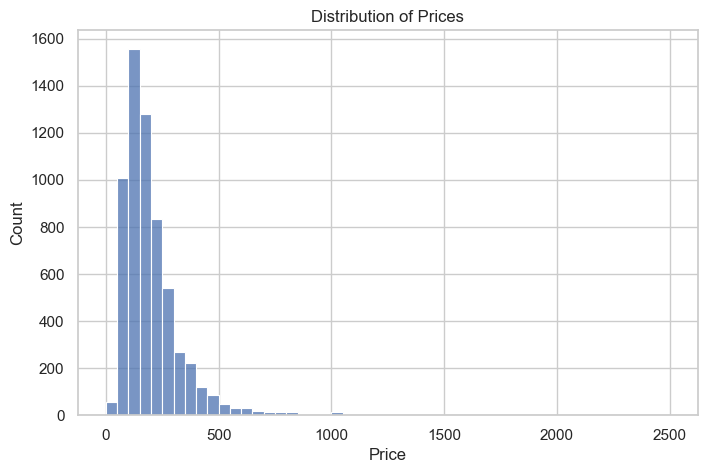

In [10]:
##Write your code here for plotting the distribution of price
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Plot a histogram for 'price'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='price', bins=50)
plt.xlabel('Price')
plt.title('Distribution of Prices')
plt.show()



**Observation**: The Distribution of price clearly indicate that the price is between 50 and 500 as per the above histogram.

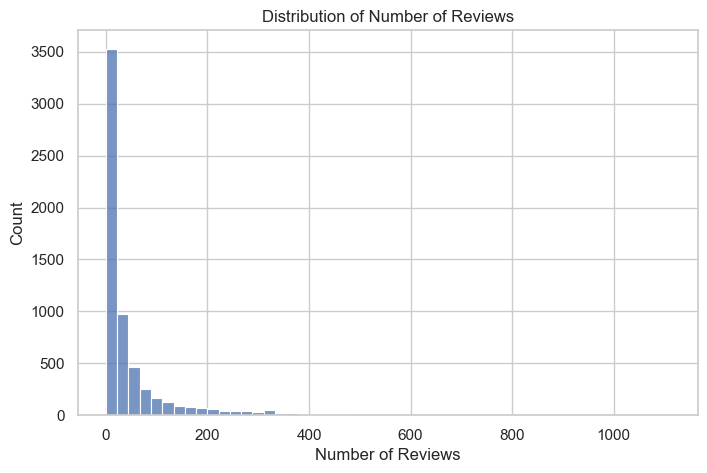

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Plot a histogram for 'number_of_reviews'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='number_of_reviews', bins=50)
plt.xlabel('Number of Reviews')
plt.title('Distribution of Number of Reviews')
plt.show()


**Observation**: 3500 are the total number of review which have not mentioned.

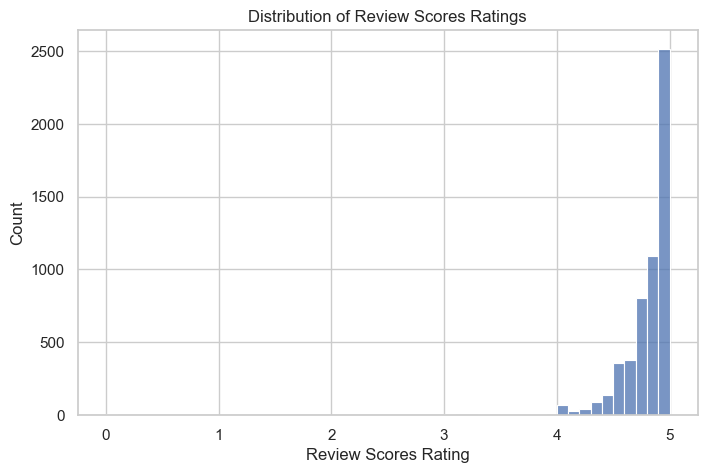

In [12]:
##Write your code here for plotting the distribution of ratings
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Plot a histogram for 'review_scores_rating'
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='review_scores_rating', bins=50)
plt.xlabel('Review Scores Rating')
plt.title('Distribution of Review Scores Ratings')
plt.show()



**Observation**: 2500 listing review score rating as 5(TOP)

### Task 3

Plot a visualization to show the number of listings for each `room_type`

Which `room_type` has the highest number of listings?

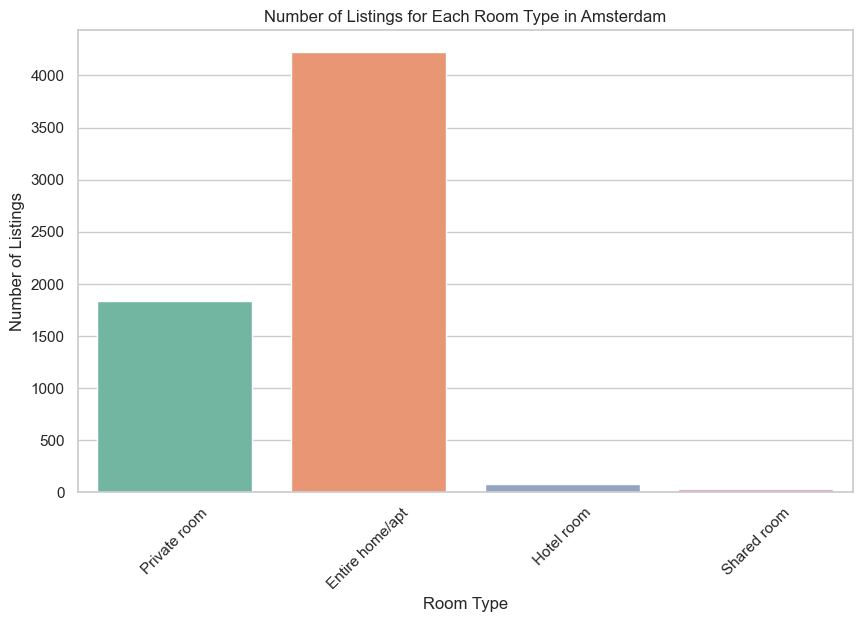

In [22]:
# Create a countplot to show the number of listings for each room type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_type', palette='Set2')

# Add labels and a title
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.title('Number of Listings for Each Room Type in Amsterdam')

# Rotate the x-axis labels for better visibility if needed
plt.xticks(rotation=45)
plt.savefig(r'C:\Users\laksh\OneDrive\Desktop\UPGRADE\TABLEAU\AirBnB listings Project\Roomtype.png')
# Show the plot
plt.show()


**Observation** -Entire Home/Appartment follow by Private Room have the highest number of listing

### Task 4

You want to observe the relationship between the reviews(given by `number_of_reviews`) and the ratings received (`review_scores_rating`) by different AirBnB listings.

For this, plot both a scatterplot and a jointplot. What can you say about the relationship between ratings and reviews?

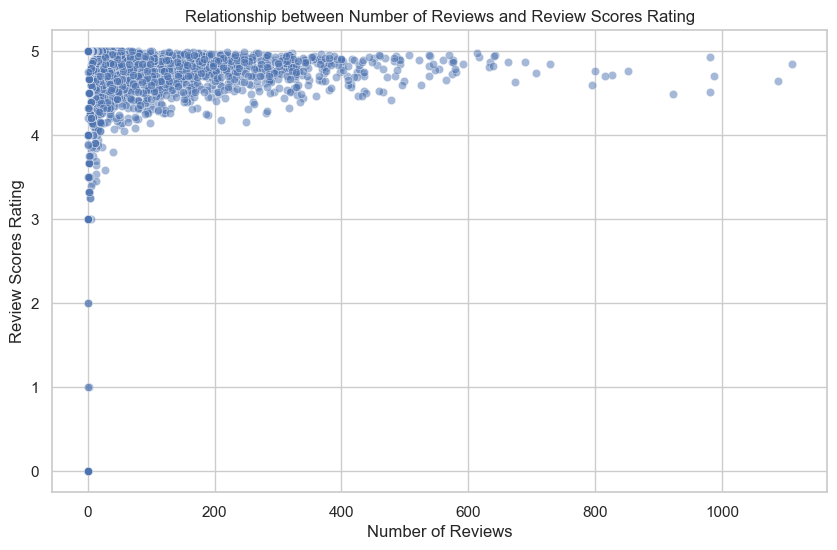

In [14]:
#Write your code here for scatterplot

# Create a scatterplot to visualize the relationship between number of reviews and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='number_of_reviews', y='review_scores_rating', alpha=0.5)

# Add labels and a title
plt.xlabel('Number of Reviews')
plt.ylabel('Review Scores Rating')
plt.title('Relationship between Number of Reviews and Review Scores Rating')

# Show the plot
plt.show()


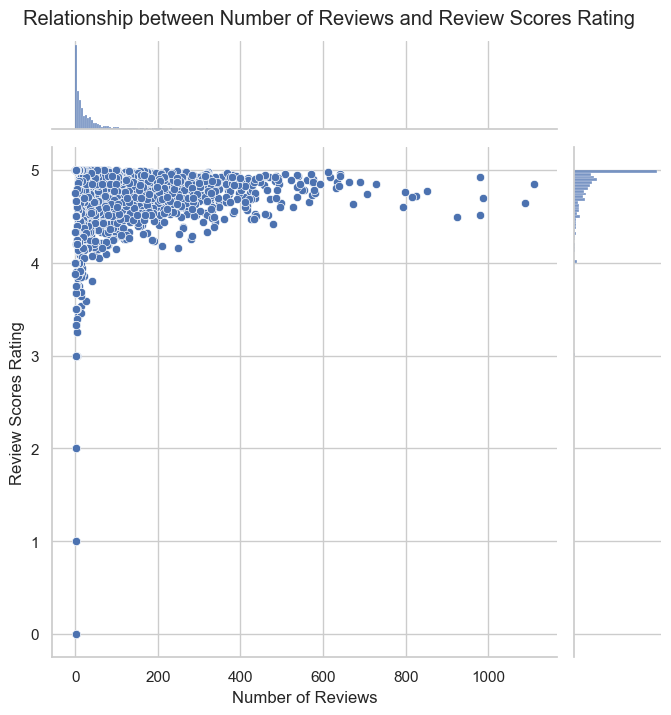

In [15]:
##Write your code here for jointplot

# Create a jointplot to visualize the relationship between number of reviews and ratings
sns.set(style="whitegrid")
sns.jointplot(data=df, x='number_of_reviews', y='review_scores_rating', kind="scatter", height=7)

# Add labels and a title
plt.xlabel('Number of Reviews')
plt.ylabel('Review Scores Rating')
plt.suptitle('Relationship between Number of Reviews and Review Scores Rating', y=1.02)

# Show the plot
plt.show()


**Observation** - From the above visualization , we have observed that from 0 to 200 number of reviews there are maximum listings done and the number of rating observed is between 4 and 5.

### Task 5

AirBnB has been adding quite a few listings in the city of Amseterdam since they started operating in 2008. Plot a lineplot to observe how the average `review_scores_rating` has changed across the different years (use `host_since_Year` column) AirBnB has been operating in the city.

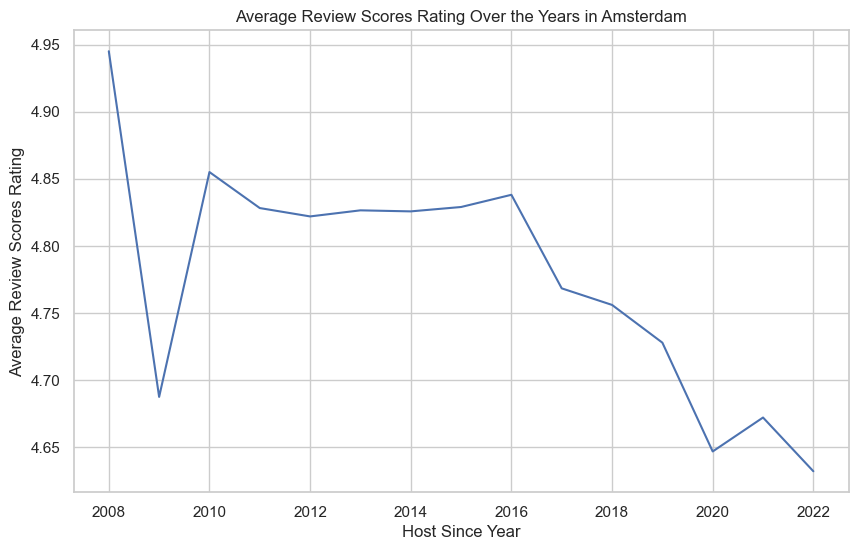

In [23]:
### Write your code for lineplot here

# Create a lineplot to visualize the average review_scores_rating across different years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='host_since_Year', y='review_scores_rating', errorbar=None)

# Add labels and a title
plt.xlabel('Host Since Year')
plt.ylabel('Average Review Scores Rating')
plt.title('Average Review Scores Rating Over the Years in Amsterdam')
plt.savefig(r'C:\Users\laksh\OneDrive\Desktop\UPGRADE\TABLEAU\AirBnB listings Project\AverageReviewProfit.png')

# Show the plot
plt.show()


**Observation** -earlier from 2008 to 2016 there is increase in Average Review Scores Rating , from 2016 onwards the downfall has increase which lead to the decrease of Average Review Scores Rating over the Years in Arrmsterdam

### Task 6

You wish to identify the relationship between the various ratings each of the listing has received from the customers.
These ratings have been summarized below:

In [17]:
review_columns = ['review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value']

Plot a heatmap of the correlation matrix of the above ratings variables and document your observations. You can use this link to understand these variables further - https://www.airbnb.co.in/help/article/1257/star-ratings

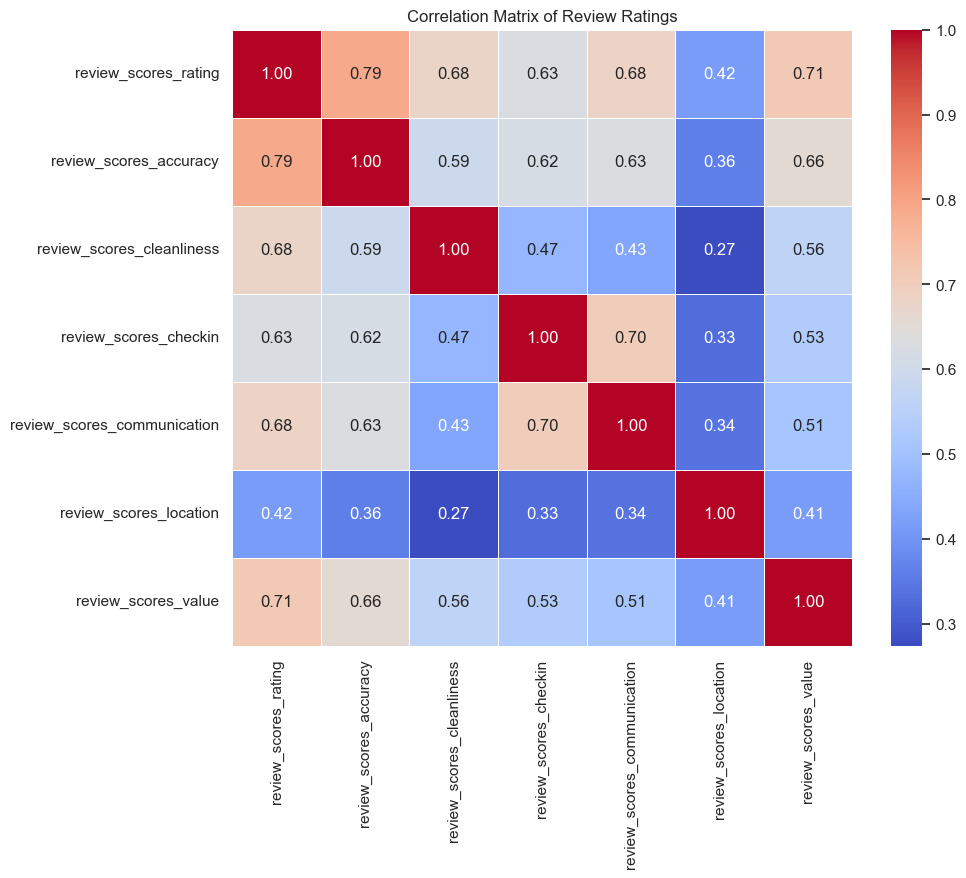

In [18]:
# Select the review columns to create the correlation matrix
review_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value'
]

# Create a correlation matrix
correlation_matrix = df[review_columns].corr()

# Set the style of the plot
sns.set(style="whitegrid")

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title('Correlation Matrix of Review Ratings')

# Show the plot
plt.show()


**Observation** - A heatmap of the correlation matrix was generated to analyze the relationships between different review ratings.Positive and negative correlations were observed, indicating how ratings were related to each other

### Task 7 

Analyze the listings' prices across the following neighborhoods using a categorical boxplot
- 'Westerpark', 'Oud-Noord', 'Noord-West','Zuid'

In [19]:
nc = ['Westerpark', 'Oud-Noord', 'Noord-West','Zuid']

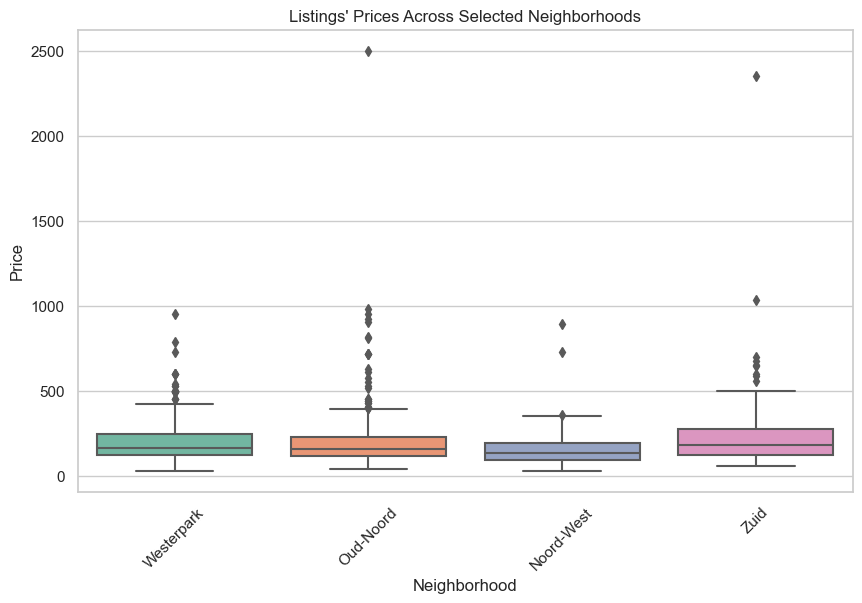

In [24]:
### Write your code for subsetting the data for only the above neighborhoods here
# Specify the neighborhoods of interest
neighborhoods_of_interest = ['Westerpark', 'Oud-Noord', 'Noord-West', 'Zuid']

# Subset the data for the specified neighborhoods
listings_in_selected_neighborhoods = df[df['neighbourhood'].isin(neighborhoods_of_interest)]

# Create a categorical boxplot to analyze prices across neighborhoods
plt.figure(figsize=(10, 6))
sns.boxplot(data=listings_in_selected_neighborhoods, x='neighbourhood', y='price', order=neighborhoods_of_interest, palette='Set2')

# Add labels and a title
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.title('Listings\' Prices Across Selected Neighborhoods')

plt.savefig(r'C:\Users\laksh\OneDrive\Desktop\UPGRADE\TABLEAU\AirBnB listings Project\ThreeNeighbourhood.png')
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()


**Observation** - Zuid people follow by westerpark and other have more listings prices across the select neighbourhood.